**Project Insight** - Dataset: videogamesales

#**Aquisição de Dados**
A preparação adequada do ambiente de trabalho é uma etapa estratégica que visa garantir organização, padronização e previsibilidade durante a execução do projeto. Essa prática é essencial para evitar inconsistências futuras, assegurar a reprodutibilidade dos resultados e manter um fluxo de trabalho estruturado e eficiente.

### Importação de Bibliotecas
Esta etapa inicial é fundamental para garantir a execução integral do código, uma vez que as bibliotecas importadas fornecem um conjunto robusto de funcionalidades analíticas, estatísticas e visuais. Por meio dessas dependências, é possível realizar desde o tratamento e análise de dados até a criação de visualizações avançadas e interativas, otimizando todo o processo de geração de insights com Python.

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt

from google.colab import files

###  Instalação da Extensão do Kaggle
Esta etapa é crucial para viabilizar a importação do conjunto de dados que será utilizado na análise. O dataset encontra-se hospedado na plataforma Kaggle, amplamente reconhecida no ecossistema de ciência de dados por oferecer repositórios públicos de alta qualidade. A instalação da extensão permite a autenticação segura e o download automatizado diretamente para o ambiente de trabalho.

In [ ]:
!pip install -q kaggle

In [ ]:
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"direnzigui","key":"9d1e862242031450d9f79074f3ff89a5"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle
!chmod 600 ~/.kaggle/kaggle.json

### Escolha do Dataset
Nesta etapa, é necessário selecionar o dataset desejado dentro da plataforma Kaggle. A escolha deve considerar a aderência aos objetivos da análise e a qualidade dos dados disponíveis.

In [ ]:
!kaggle datasets list

ref                                                      title                                                    size  lastUpdated                 downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -------------------------------------------------  ----------  --------------------------  -------------  ---------  ---------------  
rohitgrewal/airlines-flights-data                        Airlines Flights Data                                 2440299  2025-07-29 09:16:00.463000           6766        123  1.0              
wasiqaliyasir/breast-cancer-dataset                      Breast cancer dataset                                   49830  2025-07-30 12:52:44.057000           4158        149  1.0              
abdulmalik1518/cars-datasets-2025                        Cars Datasets (2025)                                    25987  2025-07-17 21:43:28.493000          10102        228  1.0              
kunshbhatia/delhi-air-quality-dataset   

In [ ]:
%cd /content/

!kaggle datasets download -d gregorut/videogamesales

/content
Dataset URL: https://www.kaggle.com/datasets/gregorut/videogamesales
License(s): unknown
videogamesales.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip videogamesales.zip -d videogamesales

Archive:  videogamesales.zip
replace videogamesales/vgsales.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: videogamesales/vgsales.csv  


#**Visualização de dados pre-tratamento**


In [ ]:
df = pd.read_csv('/content/videogamesales/vgsales.csv')
df.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
df.describe()

,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16598.000000,16327.000000,16598.000000,16598.000000,16598.000000,16598.000000,16598.000000
mean,8300.605254,2006.406443,0.264667,0.146652,0.077782,0.048063,0.537441
std,4791.853933,5.828981,0.816683,0.505351,0.309291,0.188588,1.555028
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4151.250000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8300.500000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12449.750000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.470000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


In [ ]:
df["Rank"].isnull().sum()

np.int64(0)

In [ ]:
Rank_len = len(df["Rank"])
print(Rank_len)

df.tail()

16598


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.0,0.0,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.0,0.0,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.0,0.0,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.0,0.0,0.01
16597,16600,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.0,0.0,0.01


In [ ]:
df["Rank"] = df.index+1

df

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16594,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16595,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16596,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16597,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
# Verificando se a valores nulos no dataset. (True = Ha valores nulos - False = Nao ha valores nulos)
df.isnull().sum()

,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


#**Limpeza dos Dados**

## **============== Verificando coluna Rank ==============**

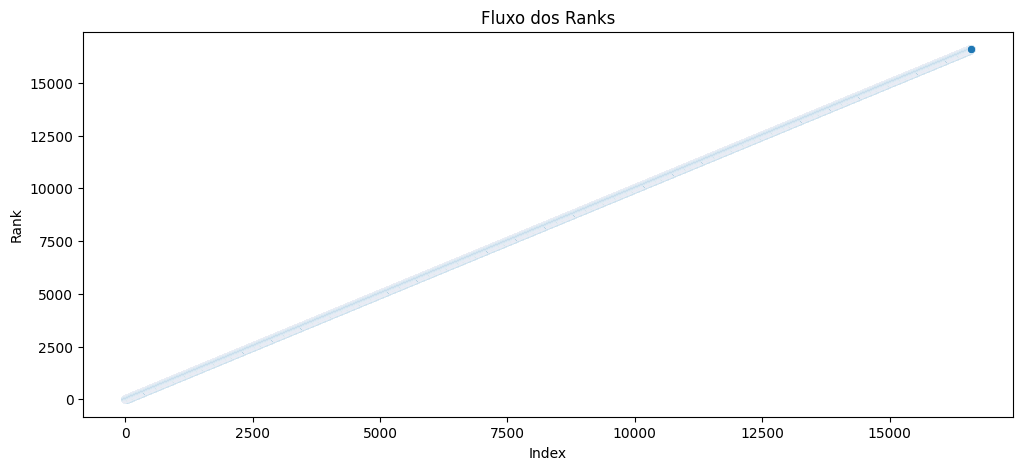

In [ ]:
plt.figure(figsize = (12, 5))
sns.scatterplot(x = df.index, y = df['Rank'])
plt.title('Fluxo dos Ranks')
plt.ylabel('Rank')
plt.xlabel('Index')

plt.show()

Conforme observado, os valores da coluna 'Rank' estão organizados em ordem crescente, conforme o esperado para este tipo de variável ordinal.

In [ ]:
# Avaliação da unicidade dos valores na coluna 'Rank'. O retorno booleano indica se todos os registros são distintos (True) ou se há duplicidades (False).
df['Rank'].is_unique

True

In [ ]:
# Confirmando o tipo da coluna
df['Rank'].dtypes

dtype('int64')

## **============== Verificando coluna Platform ==============**

Text(0.5, 1.0, 'Plataformas por venda Global')

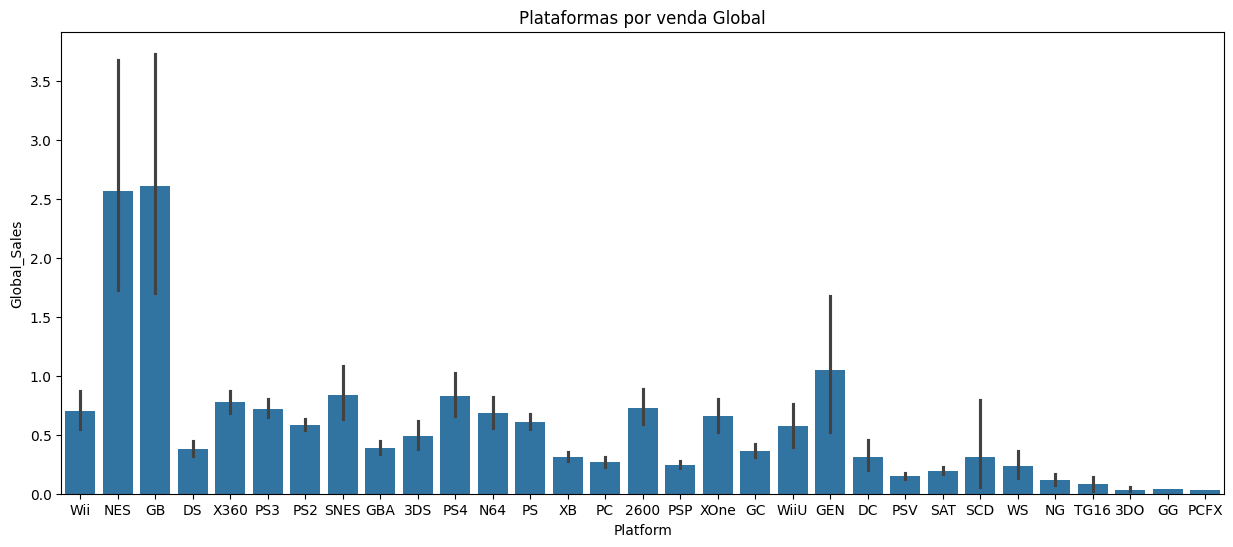

In [ ]:
plt.figure(figsize = (15, 6))
sns.barplot(data = df, x = 'Platform', y = 'Global_Sales')
plt.title('Plataformas por venda Global')

In [ ]:
# Confirmando o tipo da coluna
df['Platform'].dtypes

dtype('O')

## **============== Verificando coluna Name ==============**

Text(0.5, 0, 'Quantidade de repeticoes em Name (por grupos)')

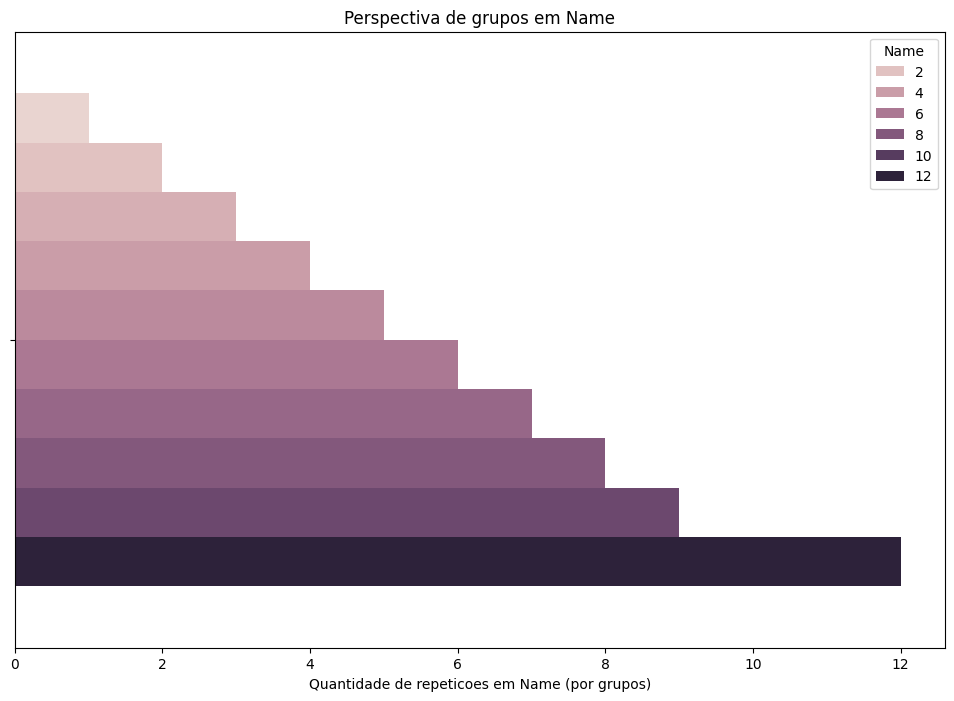

In [ ]:
group_name = df.groupby('Name')['Name'].count()

plt.figure(figsize = (12, 8))
sns.barplot(x = group_name, hue = group_name )
plt.title('Perspectiva de grupos em Name')
plt.xlabel('Quantidade de repeticoes em Name (por grupos)')

In [ ]:
df['Name'].is_unique

False

In [ ]:
df['Name'].value_counts()

,count
Name,
Need for Speed: Most Wanted,12
LEGO Marvel Super Heroes,9
Ratatouille,9
Madden NFL 07,9
FIFA 14,9
...,...
Afrika,1
Blue Dragon Plus,1
Ninja Gaiden: Dragon Sword,1


In [ ]:
# Identifica quantos elementos pertencem ao maior grupo (com valor igual a 12).
(group_name == 12).sum()

np.int64(1)

Por meio desta análise preliminar, foi possível identificar a ocorrência de repetições nos nomes dos jogos, atribuída à sua disponibilidade em múltiplas plataformas. Tal comportamento é esperado, uma vez que um mesmo título pode ser lançado para diferentes consoles ou sistemas.

## **============== Verificando coluna Year ==============**

TypeError: Bbox.from_bounds() missing 2 required positional arguments: 'width' and 'height'